In [5]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import math
import matplotlib as mpl
from scipy import stats

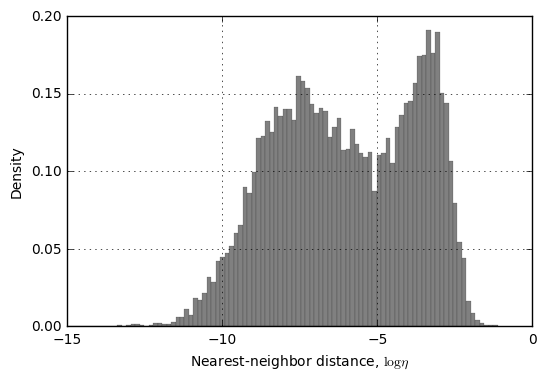

In [3]:
data=np.loadtxt('data/hs_1981_2011_06_comb_K2_A.cat_so_SCSN_v01_M3_log10eta.txt')
nnd=[x for x in data[:,0] if math.isfinite(x)]

fig=plt.figure()
ax=fig.add_subplot(111)

bins=np.linspace(min(nnd),max(nnd),100)
ax.hist(nnd,bins,normed=True,facecolor='gray',alpha=1,linewidth=0.1)

ax.grid()
ax.set_xlim([-15,0])
ax.set_xticks(np.arange(-15,1,5))
ax.set_xlabel('Nearest-neighbor distance, $\log \eta$')
ax.set_ylabel('Density')
plt.show()

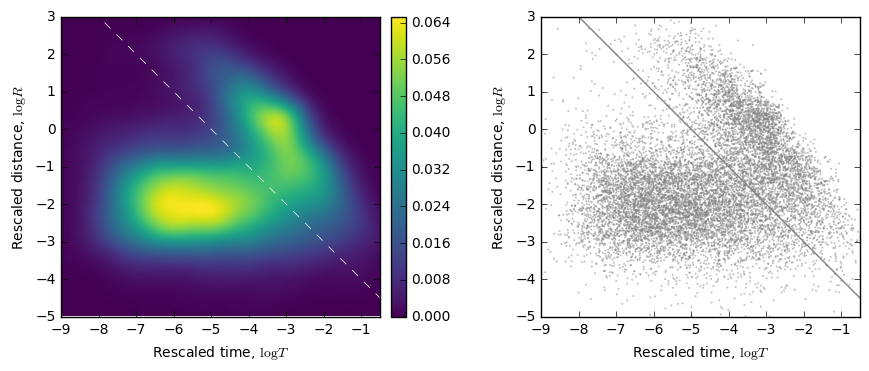

In [26]:
def density2d(m1,m2):
    xmin=m1.min(); xmax=m1.max()
    ymin=m2.min(); ymax=m2.max()
    extent=[xmin,xmax,ymin,ymax]
    X,Y=np.mgrid[xmin:xmax:100j,ymin:ymax:100j]
    positions=np.vstack([X.ravel(),Y.ravel()])
    values=np.vstack([m1,m2])
    kernel=stats.gaussian_kde(values)
    Z=np.reshape(kernel(positions).T,X.shape)
    return Z,extent

data=np.loadtxt('data/hs_1981_2011_06_comb_K2_A.cat_so_SCSN_v01_M3_T_R.txt')
m1=np.log10(data[:,0]); m2=np.log10(data[:,1])

xl=-9; xr=-0.5; yb=-5; yt=3
width=xr-xl; height=yt-yb
cmap=plt.cm.viridis
norm = mpl.colors.Normalize(vmin=Z.min(), vmax=Z.max())

Z,extent=density2d(m1,m2)
t=np.linspace(xl,xr,100)
r=-t-5

fig=plt.figure(figsize=(3, 3))
ax = fig.add_axes([0,0,width/height,1])
hist=ax.imshow(np.rot90(Z), cmap=cmap,extent=extent)
ax.plot(t,r,'w--',label='$\log R=-\log T -5$',linewidth=0.5)
ax.set_xlim([xl,xr])
ax.set_ylim([yb,yt])
ax.set_xlabel('Rescaled time, $\log T$')
ax.set_ylabel('Rescaled distance, $\log R$')

cax = fig.add_axes([1.1, 0, 0.05, 1])
mpl.colorbar.ColorbarBase(cax, norm=norm, cmap=cmap)

ax = fig.add_axes([1.6,0,width/height,1])
ax.scatter(m1,m2,s=2,facecolor='gray',edgecolor='',alpha=0.5)
ax.plot(t,r,label='$\log R=-\log T -5$',c='gray')
ax.set_xlim([xl,xr])
ax.set_ylim([yb,yt])
ax.set_xlabel('Rescaled time, $\log T$')
ax.set_ylabel('Rescaled distance, $\log R$')
plt.show()

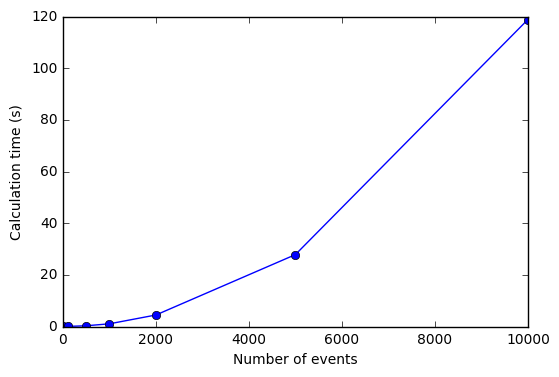

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)
num=[10,100,500,1000,2000,5000,10000]
time=[0.016,0.035,0.284,1.040,4.452,27.824,118.819]
ax.plot(num,time,'bo-',label='Cal. time')
ax.set_xlabel('Number of events')
ax.set_ylabel('Calculation time (s)')
plt.show()